# Import CSV files to Data Pandas

In [1]:
import pandas  as pd
df = pd.read_csv('Lebeled_Data.csv')
df

,Review,Label
0,เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็...,Negative
1,สัญญาณโทรศัพท์เหลือแค่ 3G ค่ายดีแทค บริเวณในห้...,Neutral
2,บริการดี ห้องสะอาด ห้องสวยโทนสีและดีไซน์เรียบง...,Positive
3,ประทับใจมากๆ ต้องไปอีกแน่นอนค่ะ,Positive
4,มาพักที่นี่ตลอดค่า ห้องสวย สะอาดมาก การเดินทาง...,Positive
...,...,...
1739,ห้องสบายมาก ในราคานี้ แต่เสียอย่างเดียว คืออยู...,Positive
1740,ห้องพักสะอาดมากค่ะ บริการประทับใจ,Positive
1741,สะอาดดี ราคากลางๆค่อนไปถูก คุ้มค่ากับราคา,Positive
1742,ดีมาก ห้องสะอาด ตกแต่งสวยมากๆ,Positive


# Cleaning

### DeEmoji

In [2]:
!pip install emoji

import emoji

# function remove emoji from text
def remove_emoji(text):
  return ''.join([c for c in text if c not in emoji.EMOJI_DATA])

In [3]:
df['Review'] = df['Review'].apply(remove_emoji)

### Punctuation Removal: 

In [4]:
#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#กำจัดตัวปัญหา เช่น ๆ, \n, \nbad
def filter_content(text):
    text_filtered = ''.join([i for i in text if not i.isdigit()])
    for i in ["#","'","%","?","#","@","!","\xa0",'/','"',")","(","-","_",'“','”',"ๆ","'์","ฯลฯ","ฯ","&","<",">",".","+",":",'\n']:
        text_filtered = text_filtered.replace(i,"")
        text_filtered = text_filtered.replace(","," ")
    return text_filtered

In [7]:
df['Review'] = df['Review'].apply(remove_punctuation)

In [8]:
df['Review'] = df['Review'].apply(filter_content)

In [9]:
df['Review'][1]

'สัญญาณโทรศัพท์เหลือแค่ G ค่ายดีแทค บริเวณในห้องพักชั้น '

#### ดู Label ว่าครบไหม และ แก้ไขส่วนผิดพลาด

In [10]:
df['Label'].unique()

array(['Negative', 'Neutral', 'Positive', nan], dtype=object)

In [11]:
df.loc[pd.isna(df["Label"]), :].index

Int64Index([309, 313, 324, 1694], dtype='int64')

In [12]:
print(df['Review'][309],'\n')
print(df['Review'][313],'\n')
print(df['Review'][324],'\n')
print(df['Review'][1694],'\n')

ใกล้ MRT และ Airport Link พนักงานบริการดี มีอาหารเช้าหลากหลายให้เลือก ที่พักห้องกว้าง แต่มีกลิ่นเหมือนไม้อัด 

สะอาด สะดวก มีครบครัน แต่ fitness สระว่ายน้ำปิดบริการเร็วไปหน่อย ทางเข้าเปลี่ยวเล็กน้อยแต่เป็นแค่ระยะทางสั้น 

ใกล้ mrt  airport linkห้องโอเค 

NAME 



In [13]:
df['Label'][309] = 'Positive'
df['Label'][313] = 'Positive'
df['Label'][324] = 'Positive'
df = df.drop(df.index[1694])

In [14]:
print(df['Label'][309],'\n')
print(df['Label'][313],'\n')
print(df['Label'][324],'\n')

Positive 

Positive 

Positive 



In [15]:
df['Label'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [16]:
df.loc[pd.isna(df["Label"]), :].index

Int64Index([], dtype='int64')

In [17]:
df['Label'].value_counts()

Positive    1049
Negative     407
Neutral      287
Name: Label, dtype: int64

<AxesSubplot:>

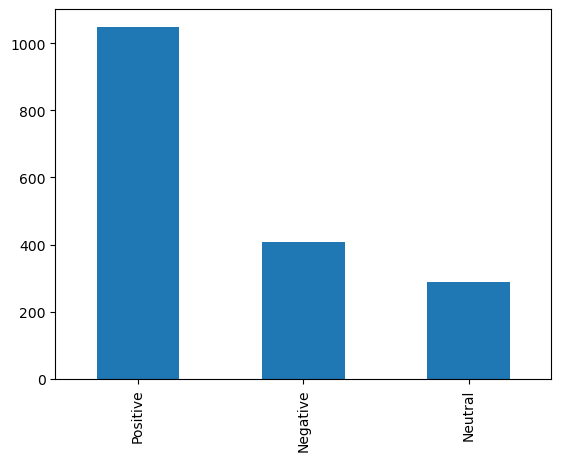

In [18]:
df['Label'].value_counts().plot.bar()

### Lower Case Letters

In [19]:
def lower_case(data):
    return data.lower()

In [20]:
df['Review'] = df['Review'].apply(lower_case)

In [21]:
for i in range(30):
    print(df['Review'][i])

เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็แล้ว บัตรประชาชน ใบเสร็จต่าง ให้ดูหมดแล้ว ทำงานช้าเหมือนงง เอามือถือให้ดูรายละเอียด ก็ถือวิสาสะกดเอง สไลด์เอง ไม่มีมารยาท ไม่ไปอีกแล้ว ที่พักอื่นมีเยอะแยะระแวกนั้น
สัญญาณโทรศัพท์เหลือแค่ g ค่ายดีแทค บริเวณในห้องพักชั้น 
บริการดี ห้องสะอาด ห้องสวยโทนสีและดีไซน์เรียบง่าย ที่นอนนุ่มสบายมาก สระว่ายน้ำสวยมาก
ประทับใจมาก ต้องไปอีกแน่นอนค่ะ
มาพักที่นี่ตลอดค่า ห้องสวย สะอาดมาก การเดินทางสะดวก
ดีมาก โรงเเรมสวย พนักงานน่ารักทุกคน อาหารอร่อย หลับสบายมาก ประทับใจ เดือนหน้าจะไปพักอีก️
reception บริการดี ห้องสะอาด สบู่หอมค่ะ
ดีมากค่ะ ชอบโรงแรมสวย พนักงานน่ารักมากค่ะ
ห้องพักน่าอยู่มาก สะอาด ห้องน้ำเป็นสัดส่วนดี
ที่จอดรถน้อยไป พนักงาน ดูแลดี วิวดี สภาพโอค่ะ
ที่พักสบายพนักงานต้อนรับบริการดีมากครับ
ดีงามมาก สวย สุดยอด ดีงามทุกมุมถ้าถ่ายรูป
โรงแรมสวยตรงปก สะอาดมาก พนักงานบริการดีทุกแผนก เสียนิดเดียวที่จอดรถน้อยไปหน่อยค่ะ
ห้องสะอาดมาก สวย ทำเลดี เดินทางสะดวกค่ะ
ห้องพักดีมากค่า ประทับใจมาก วิวสระน้ำดีมากค่า ห้องสะอาด
ดีมาก สะอาด ปลอดภัย นอนหลับฝันดี ราคาน่ารักม

### จัดการกับการพิมพ์ข้อความที่เรียงผิดหรือใช้ผิดอักษร

เราสามารถจัดการกับการพิมพ์ข้อความที่เรียงผิดหรือใช้ผิดอักษร เช่น "แ" พิมพ์เป็น "เ เ" หรือ "ต้้้้น" เป็นต้น ได้ง่าย ๆ ด้วย PyThaiNLP

In [22]:
!pip install pythainlp

from pythainlp.util import normalize

def normalize_TH(data):
    return normalize(data)

In [23]:
df['Review'] = df['Review'].apply(normalize_TH)

In [24]:
for i in range(30):
    print(df['Review'][i]) 

เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็แล้ว บัตรประชาชน ใบเสร็จต่าง ให้ดูหมดแล้ว ทำงานช้าเหมือนงง เอามือถือให้ดูรายละเอียด ก็ถือวิสาสะกดเอง สไลด์เอง ไม่มีมารยาท ไม่ไปอีกแล้ว ที่พักอื่นมีเยอะแยะระแวกนั้น
สัญญาณโทรศัพท์เหลือแค่ g ค่ายดีแทค บริเวณในห้องพักชั้น
บริการดี ห้องสะอาด ห้องสวยโทนสีและดีไซน์เรียบง่าย ที่นอนนุ่มสบายมาก สระว่ายน้ำสวยมาก
ประทับใจมาก ต้องไปอีกแน่นอนค่ะ
มาพักที่นี่ตลอดค่า ห้องสวย สะอาดมาก การเดินทางสะดวก
ดีมาก โรงแรมสวย พนักงานน่ารักทุกคน อาหารอร่อย หลับสบายมาก ประทับใจ เดือนหน้าจะไปพักอีก️
reception บริการดี ห้องสะอาด สบู่หอมค่ะ
ดีมากค่ะ ชอบโรงแรมสวย พนักงานน่ารักมากค่ะ
ห้องพักน่าอยู่มาก สะอาด ห้องน้ำเป็นสัดส่วนดี
ที่จอดรถน้อยไป พนักงาน ดูแลดี วิวดี สภาพโอค่ะ
ที่พักสบายพนักงานต้อนรับบริการดีมากครับ
ดีงามมาก สวย สุดยอด ดีงามทุกมุมถ้าถ่ายรูป
โรงแรมสวยตรงปก สะอาดมาก พนักงานบริการดีทุกแผนก เสียนิดเดียวที่จอดรถน้อยไปหน่อยค่ะ
ห้องสะอาดมาก สวย ทำเลดี เดินทางสะดวกค่ะ
ห้องพักดีมากค่า ประทับใจมาก วิวสระน้ำดีมากค่า ห้องสะอาด
ดีมาก สะอาด ปลอดภัย นอนหลับฝันดี ราคาน่ารักมาก

### แยกภาษาเอาเฉพาะภาษาไทย

In [31]:
from pythainlp.util import isthaichar
import numpy as np
list_TH_sentences = []
k = 0

In [32]:
for i in df['Review']:
    is_true = 0 
    for j in range(len(i)):
        answer = isthaichar(i[j])
        if answer == True:
            is_true += 1
        else:
            pass
    k += 1
    print(k,is_true, round(len(i)/2))
    if is_true >= round(len(i)/2):
        list_TH_sentences.append(True)
        print(i,' : is True')
    else:
        list_TH_sentences.append(False)
        print(i,' : is False')

1 198 104
เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็แล้ว บัตรประชาชน ใบเสร็จต่าง ให้ดูหมดแล้ว ทำงานช้าเหมือนงง เอามือถือให้ดูรายละเอียด ก็ถือวิสาสะกดเอง สไลด์เอง ไม่มีมารยาท ไม่ไปอีกแล้ว ที่พักอื่นมีเยอะแยะระแวกนั้น  : is True
2 50 27
สัญญาณโทรศัพท์เหลือแค่ g ค่ายดีแทค บริเวณในห้องพักชั้น  : is True
3 80 42
บริการดี ห้องสะอาด ห้องสวยโทนสีและดีไซน์เรียบง่าย ที่นอนนุ่มสบายมาก สระว่ายน้ำสวยมาก  : is True
4 29 15
ประทับใจมาก ต้องไปอีกแน่นอนค่ะ  : is True
5 48 26
มาพักที่นี่ตลอดค่า ห้องสวย สะอาดมาก การเดินทางสะดวก  : is True
6 80 44
ดีมาก โรงแรมสวย พนักงานน่ารักทุกคน อาหารอร่อย หลับสบายมาก ประทับใจ เดือนหน้าจะไปพักอีก️  : is True
7 27 20
reception บริการดี ห้องสะอาด สบู่หอมค่ะ  : is True
8 39 20
ดีมากค่ะ ชอบโรงแรมสวย พนักงานน่ารักมากค่ะ  : is True
9 42 22
ห้องพักน่าอยู่มาก สะอาด ห้องน้ำเป็นสัดส่วนดี  : is True
10 41 22
ที่จอดรถน้อยไป พนักงาน ดูแลดี วิวดี สภาพโอค่ะ  : is True
11 39 20
ที่พักสบายพนักงานต้อนรับบริการดีมากครับ  : is True
12 38 20
ดีงามมาก สวย สุดยอด ดีงามทุกมุมถ้าถ่ายรูป  :

In [33]:
list_TH_sentences = pd.Series(list_TH_sentences)

In [34]:
list_TH_sentences.value_counts()

True     1737
False       6
dtype: int64

In [35]:
index_false_eng = list_TH_sentences[list_TH_sentences == False].index

In [36]:
index_false_eng

Int64Index([72, 241, 284, 324, 496, 637], dtype='int64')

In [37]:
for i in index_false_eng:
    print(i,df['Review'][i],'\n')

72 the hotel is great feeling cozy yet very artistic i like that even though the room is small but there is a big bathtub that can fit grownups unfortunately it was not allowed to use the pool 

241 ใกล้ mrt เดินทางสะดวก good room service 

284 สะดวก สบาย ใกล้ mrt และ airport link 

324 ใกล้ mrt airport linkห้องโอเค 

496 hotel is convenient near to night market and all amenities is just downstairs and hotel provide tuk tuk service to mrt 

637 สะอาด สะดวก สบาย very good service and nice location 



In [170]:
df = df.drop([72, 496]).reset_index()
df

,index,Review,Label
0,0,เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็...,Negative
1,1,สัญญาณโทรศัพท์เหลือแค่ g ค่ายดีแทค บริเวณในห้อ...,Neutral
2,2,บริการดี ห้องสะอาด ห้องสวยโทนสีและดีไซน์เรียบง...,Positive
3,3,ประทับใจมาก ต้องไปอีกแน่นอนค่ะ,Positive
4,4,มาพักที่นี่ตลอดค่า ห้องสวย สะอาดมาก การเดินทาง...,Positive
...,...,...,...
1736,1739,ห้องสบายมาก ในราคานี้ แต่เสียอย่างเดียว คืออยู...,Positive
1737,1740,ห้องพักสะอาดมากค่ะ บริการประทับใจ,Positive
1738,1741,สะอาดดี ราคากลางค่อนไปถูก คุ้มค่ากับราคา,Positive
1739,1742,ดีมาก ห้องสะอาด ตกแต่งสวยมาก,Positive


In [171]:
df['Review'][0]

'เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็แล้ว บัตรประชาชน ใบเสร็จต่าง ให้ดูหมดแล้ว ทำงานช้าเหมือนงง เอามือถือให้ดูรายละเอียด ก็ถือวิสาสะกดเอง สไลด์เอง ไม่มีมารยาท ไม่ไปอีกแล้ว ที่พักอื่นมีเยอะแยะระแวกนั้น'

In [172]:
df = df.drop(['index'],axis=1)
df

,Review,Label
0,เช็คอินช้าเหมือนทำงานไม่เป็น แจ้งเลขบุ๊คกิ้งก็...,Negative
1,สัญญาณโทรศัพท์เหลือแค่ g ค่ายดีแทค บริเวณในห้อ...,Neutral
2,บริการดี ห้องสะอาด ห้องสวยโทนสีและดีไซน์เรียบง...,Positive
3,ประทับใจมาก ต้องไปอีกแน่นอนค่ะ,Positive
4,มาพักที่นี่ตลอดค่า ห้องสวย สะอาดมาก การเดินทาง...,Positive
...,...,...
1736,ห้องสบายมาก ในราคานี้ แต่เสียอย่างเดียว คืออยู...,Positive
1737,ห้องพักสะอาดมากค่ะ บริการประทับใจ,Positive
1738,สะอาดดี ราคากลางค่อนไปถูก คุ้มค่ากับราคา,Positive
1739,ดีมาก ห้องสะอาด ตกแต่งสวยมาก,Positive


# ขั้นการตัดคำ

### Word Segmentation

In [173]:
!pip install attacut

### By Text Tokenize

In [174]:
from pythainlp.tokenize import word_tokenize

In [175]:
def tokenize(text):
    return word_tokenize(text,engine ='attacut', keep_whitespace=False)

In [176]:
df_tokened = df['Review'].apply(tokenize)

In [177]:
df_tokened

0       [เช็ค, อิน, ช้า, เหมือน, ทำ, งาน, ไม่, เป็น, แ...
1       [สัญญาณ, โทรศัพท์, เหลือ, แค่, g, ค่าย, ดีแทค,...
2       [บริการ, ดี, ห้อง, สะอาด, ห้อง, สวย, โทน, สี, ...
3             [ประทับใจ, มาก, ต้อง, ไป, อีก, แน่นอน, ค่ะ]
4       [มา, พัก, ที่, นี่, ตลอด, ค่า, ห้อง, สวย, สะอา...
                              ...                        
1736    [ห้อง, สบาย, มาก, ใน, ราคา, นี้, แต่, เสีย, อย...
1737       [ห้อง, พัก, สะอาด, มาก, ค่ะ, บริการ, ประทับใจ]
1738    [สะอาด, ดี, ราคา, กลาง, ค่อน, ไป, ถูก, คุ้ม, ค...
1739             [ดี, มาก, ห้อง, สะอาด, ตกแต่ง, สวย, มาก]
1740    [โรง, แรม, ถือ, ว่า, ดี, มาก, ครับ, เงียบ, มี,...
Name: Review, Length: 1741, dtype: object

In [178]:
for i in range(10):
    print(df_tokened[i])

['เช็ค', 'อิน', 'ช้า', 'เหมือน', 'ทำ', 'งาน', 'ไม่', 'เป็น', 'แจ้ง', 'เลข', 'บุ๊คกิ้ง', 'ก็', 'แล้ว', 'บัตร', 'ประชาชน', 'ใบ', 'เสร็จ', 'ต่าง', 'ให้', 'ดู', 'หมด', 'แล้ว', 'ทำ', 'งาน', 'ช้า', 'เหมือน', 'งง', 'เอา', 'มือถือ', 'ให้', 'ดู', 'รายละเอียด', 'ก็', 'ถือ', 'วิสาสะกด', 'เอง', 'สไลด์', 'เอง', 'ไม่', 'มี', 'มารยาท', 'ไม่', 'ไป', 'อีก', 'แล้ว', 'ที่', 'พัก', 'อื่น', 'มี', 'เยอะแยะ', 'ระแวก', 'นั้น']
['สัญญาณ', 'โทรศัพท์', 'เหลือ', 'แค่', 'g', 'ค่าย', 'ดีแทค', 'บริเวณ', 'ใน', 'ห้อง', 'พัก', 'ชั้น']
['บริการ', 'ดี', 'ห้อง', 'สะอาด', 'ห้อง', 'สวย', 'โทน', 'สี', 'และ', 'ดีไซน์', 'เรียบง่าย', 'ที่', 'นอน', 'นุ่ม', 'สบาย', 'มาก', 'สระ', 'ว่าย', 'น้ำ', 'สวย', 'มาก']
['ประทับใจ', 'มาก', 'ต้อง', 'ไป', 'อีก', 'แน่นอน', 'ค่ะ']
['มา', 'พัก', 'ที่', 'นี่', 'ตลอด', 'ค่า', 'ห้อง', 'สวย', 'สะอาด', 'มาก', 'การ', 'เดินทาง', 'สะดวก']
['ดี', 'มาก', 'โรง', 'แรม', 'สวย', 'พนักงาน', 'น่า', 'รัก', 'ทุก', 'คน', 'อาหาร', 'อร่อย', 'หลับ', 'สบาย', 'มาก', 'ประทับใจ', 'เดือน', 'หน้า', 'จะ', 'ไป', 'พัก', 'อีก', 

In [179]:
#Try This One
"""
print("newmm    :", word_tokenize(text, keep_whitespace=False),'\n')  # default engine is "newmm"

print("longest  :", word_tokenize(text, engine="longest", keep_whitespace=False),'\n')

print("multi_cut:", word_tokenize(text, engine="multi_cut", keep_whitespace=False),'\n')

print("newmm-safe :", word_tokenize(text, engine="newmm-safe", keep_whitespace=False),'\n')
"""

'\nprint("newmm    :", word_tokenize(text, keep_whitespace=False),\'\n\')  # default engine is "newmm"\n\nprint("longest  :", word_tokenize(text, engine="longest", keep_whitespace=False),\'\n\')\n\nprint("multi_cut:", word_tokenize(text, engine="multi_cut", keep_whitespace=False),\'\n\')\n\nprint("newmm-safe :", word_tokenize(text, engine="newmm-safe", keep_whitespace=False),\'\n\')\n'

### TF-IDF

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [181]:
TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

TfidfVectorizer(max_features=150000, ngram_range=(1, 2), stop_words='english')

In [182]:
def identity_fun(text):
    return text

In [183]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', #this is default
                                   tokenizer=identity_fun, #does no extra tokenizing
                                   preprocessor=identity_fun, #no extra preprocessor
                                   token_pattern=None)
#สุ่มช่วงของ 5 เอกสารที่ติดกันมาทดลองใช้งาน
tfidf_vector= tfidf_vectorizer.fit_transform(df_tokened)
features = tfidf_vectorizer.get_feature_names()
tfidf_array = np.array(tfidf_vector.todense())

df_new = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names())
df_new

C:\Users\FAIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,abf,ac,access,agent,airport,airportlink,aja,amaranta,amazingggg,...,ไหม,ไหร่,ไหล,ไหว,ไหว้,ไอ้,ไฮเทคโนโลยี,ไฮไลท์,้,️
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
tfidf_array.shape

(1741, 2723)

In [185]:
print(df_new.apply(lambda s: s.nlargest(10).index.tolist(), axis=1).ravel()) 

[list(['ช้า', 'แล้ว', 'เอง', 'งาน', 'ดู', 'เหมือน', 'บุ๊คกิ้ง', 'ระแวก', 'วิสาสะกด', 'สไลด์'])
 list(['g', 'ค่าย', 'ดีแทค', 'เหลือ', 'โทรศัพท์', 'สัญญาณ', 'บริเวณ', 'แค่', 'ชั้น', 'ใน'])
 list(['เรียบง่าย', 'โทน', 'สวย', 'ดีไซน์', 'สี', 'นุ่ม', 'ว่าย', 'สระ', 'มาก', 'สบาย'])
 ...
 list(['ค่อน', 'ราคา', 'ถูก', 'กลาง', 'คุ้ม', 'ค่า', 'กับ', 'ไป', 'สะอาด', 'ดี'])
 list(['ตกแต่ง', 'สวย', 'มาก', 'สะอาด', 'ห้อง', 'ดี', 'a', 'abf', 'ac', 'access'])
 list(['ครับ', 'แอร์', 'เสียง', 'ฝา', 'ท่อ', 'ไหร่', 'เล็กน้อย', 'ลึก', 'ซอย', 'เท่า'])]


In [47]:
for i in range(2722):
    print(df_new.columns[i])

a
abf
ac
access
agent
airport
airportlink
aja
amaranta
amazingggg
and
apartment
app
arl
asmr
atmbkk
aลง
b
backpackers
bad
baiyoke
bayoksky
bed
bellboys
bgt
bkk
booking
bts
bus
c
card
care
center
chatucak
chech
check
checkin
connect
connecting
contemporary
counter
covid
d
deket
deluxe
desk
dijln
dmk
door
dorm
drink
e
ekey
eleven
ever
everything
exit
facillities
family
fitness
floor
food
front
fx
g
good
grab
hbo
hd
hommy
hotel
i
in
instagram
instagramable
ipad
its
j
josh
junior
key
keycard
king
kl
ks
lacoste
like
line
link
lobby
location
lock
love
luxury
m
man
mind
modern
mrt
mrtพหลโยธิน
n
nice
ok
okkkk
one
or
out
p
paradhipat
perfect
pizza
polllll
pool
popup
private
quotตุ๊กตุ๊กquot
railink
rb
reception
request
resident
room
service
shuttle
single
sky
slipper
smell
so
staff
standard
starbuck
station
street
suite
super
superior
swimspa
t
take
taxi
the
travelokaแจ้ง
tt
tuk
twin
uhg
very
walk
welcome
welcomedrink
wfh
wifi
wifiหลุด
wifiโแย่
wifiให้
x
°
กก
กกกกก
กค
กฏคะ
กด
กดดัน
กดแม่ง
กทม
ก

## Stop Word กำจัดตัวเลข ช่องว่างและเครื่องหมายวรรคตอน พร้อมทั้งคำที่ไม่มีนัยสำคัญออก

In [48]:
"""
from pythainlp.corpus import thai_stopwords
stop_words= thai_stopwords()
"""

'\nfrom pythainlp.corpus import thai_stopwords\nstop_words= thai_stopwords()\n'

In [49]:
#print(stop_words)

In [50]:
#df_stopword,check_word = [], []

In [51]:
"""
def perform_removal(word):
    #กำจัด stop words และตัวเลขโดดๆ
    if word in stop_words:
        return None
    else:
        return word 
"""

'\ndef perform_removal(word):\n    #กำจัด stop words และตัวเลขโดดๆ\n    if word in stop_words:\n        return None\n    else:\n        return word \n'

In [52]:
"""
for i in df_tokened :
    check_word = []
    for j in range(len(i)) :
        check_word.append(perform_removal(i[j]))
    check_word = list(filter(lambda item: item is not None, check_word))
    df_stopword.append(check_word)
"""

'\nfor i in df_tokened :\n    check_word = []\n    for j in range(len(i)) :\n        check_word.append(perform_removal(i[j]))\n    check_word = list(filter(lambda item: item is not None, check_word))\n    df_stopword.append(check_word)\n'

In [53]:
#type(df_stopword)

In [54]:
#len(df_stopword)

In [55]:
"""
for i in range(10):
    print(df_stopword[i])
"""

'\nfor i in range(10):\n    print(df_stopword[i])\n'

In [56]:
#df_stopword[0]

In [57]:
#len(df_stopword[0])

# NER กำลังดำเนินการ ศึกษาอยู่